# Overview

This notebook encapsulates common operations of importing data from local files, inspecting the data, and fixing the data so that we can get "clean" data for further processing and analysis.

**CREDIT** This notebook is based on [Data Quest Jupyter tutorial](https://www.dataquest.io/blog/jupyter-notebook-tutorial/).

In [7]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="darkgrid")

## Data Import

Import csv files into a Jupyter notebook.

In [8]:
df = pd.read_csv('data/fortune500.csv')

## Data Inspection

Now that we have the data imported from a csv file, we want to inspect the dataset for data integrity and quality.

### Quick Validation

We start with some quick validations with the imported data.

In [9]:
count_rows = len(df)
print('First 5 rows:')
print(df.head())
print()
print('# Rows: %d' % count_rows)

First 5 rows:
   Year  Rank           Company  Revenue (in millions) Profit (in millions)
0  1955     1    General Motors                 9823.5                  806
1  1955     2       Exxon Mobil                 5661.4                584.8
2  1955     3        U.S. Steel                 3250.4                195.4
3  1955     4  General Electric                 2959.1                212.6
4  1955     5            Esmark                 2510.8                 19.1

# Rows: 25500


### Deeper Inspection

After an initial pass, let's parse the data for a deeper interpretation.

In [10]:
df.columns = ['year', 'rank', 'company', 'revenue', 'profit']
print('The data types of the columns')
print(df.dtypes)

The data types of the columns
year         int64
rank         int64
company     object
revenue    float64
profit      object
dtype: object


### Analyze the Issue

Column `profit` should be a numeric type, but it is interpreted by `pandas` as an `object`. This usually means that the dataset probably contain some non-numeric values. Use the following to probe deeper into the `profit` column.

Sample rows where profit != numeric value
     year  rank                company  revenue profit
228  1955   229                 Norton    135.0   N.A.
290  1955   291        Schlitz Brewing    100.0   N.A.
294  1955   295  Pacific Vegetable Oil     97.9   N.A.
296  1955   297     Liebmann Breweries     96.0   N.A.
352  1955   353     Minneapolis-Moline     77.4   N.A.

# Rows where profit != numeric value: 369
% rows where profit != numeric value: 1.447


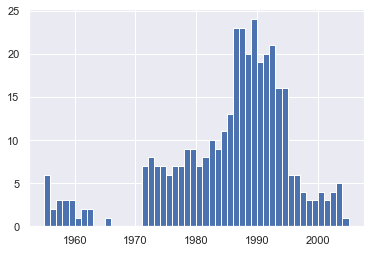

In [11]:
# ^ matches any characters not in [ ., -, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0 ]
invalid_profits = df.profit.str.contains('[^0-9.-]')
sample = df.loc[invalid_profits].head()
count_invalid_profits = len(df.loc[invalid_profits])
percent_invalid_profits = count_invalid_profits / count_rows * 100
print('Sample rows where profit != numeric value')
print(sample)
print()
print('# Rows where profit != numeric value: %d' % count_invalid_profits)
print('%% rows where profit != numeric value: %.3f' % percent_invalid_profits)

# We also plot a chart to see how many rows per year have invalid profit values.
bin_sizes, _, _ = plt.hist(df.year[invalid_profits], bins=range(1955, 2006))

### Fix the Issue

2 common ways to fix columns with the invalid values are:
* remove the row
* correct the data value

As you can see from the chart, most years have fewer than 10 companies that have invalid profit values. Given this figure, we should be okay to just remove those rows with invalid profits.

Here's how we do it.

In [12]:
# Only rows with valid profits
valid_profits = ~invalid_profits
df = df.loc[valid_profits]
print('First 5 rows:')
print(df.head())
print()
print('# Rows: %d' % len(df))
# Force profits as a numeric type since it was auto configured to be object due to invalid values during loading
df.profit = df.profit.apply(pd.to_numeric)
print()
print('The data types of the columns')
print(df.dtypes)

First 5 rows:
   year  rank           company  revenue profit
0  1955     1    General Motors   9823.5    806
1  1955     2       Exxon Mobil   5661.4  584.8
2  1955     3        U.S. Steel   3250.4  195.4
3  1955     4  General Electric   2959.1  212.6
4  1955     5            Esmark   2510.8   19.1

# Rows: 25131

The data types of the columns
year         int64
rank         int64
company     object
revenue    float64
profit     float64
dtype: object


Finally, the dataframe `df` is now clean and ready for further processing and analysis.